# Assignment 1
**DUE: Sunday June 28, 2020 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Zachary Schmitt"
STUDENT_ID = "1574482"

## Problem 1 -  Bayes' Theorem

Suppose there exists a test to classify emails as spam or not spam based on the contained words. This test accurately identifies spam (if it is actually spam) 95% of the time. The prevalence of spam emails is 3 in 10. Also, if an email isn't spam, the test will incorrectly classify it as spam 5% of the time.

NOTE: For each of the following questions, please give each answer to at least 2 significant digit accuracy. To accomplish this, don't round off your results until the very last step of each calculation.

### (a) What's the probability that an email picked at random is spam? What's the probability that an email picked at random isn't spam?

Pr(Spam) = 3/10 = 0.30

 Pr(!Spam) = 1 - 3/10 = 7/10 = 0.70

### (b) If you test an email and it reports positive for spam, what is the probability that it is spam?

Pr(Spam | test_pos) = 0.95 probability  



### (c) If you test an email and it reports negative for spam, what is the probability that it is spam?

Pr(Spam | test_neg) = Pr(test_neg | spam) * pr(spam) / pr(test_neg)

= 0.05 * 0.30 / 0.95 * .7 

=0.23 probability 

## Monte Carlo Simulations

Monte Carlo simulations can yield numeric solutions to probability problems that aren't possible to solve analytically. These simulations are also often easy to code up, and so also provide a way to check one's calculations for problems that amenable to analysis. So this is an important technique to become familiar with.

Basically, one creates a simulation of the situation, and runs many trials that allow one to estimate the probabilities by computing proportions. 

First we give you an example of a Monte Carlo simulation, and then you'll solve such a problem yourself.

### Example

If you toss a coin 10 times, with what probability are you likely to see the subsequence {H, H, T, T} appear?

Be patient, this may take a bit to run, but notice how straightforward the coding is. The simplicity of the Monte Carlo method makes it very powerful.

In [1]:
from numpy.random import randint
import numpy as np

num_tosses = 10    # tosses per trial
num_trials = 100000

# This sets the feedback interval so we know the program hasn't crashed.
feedback = int(np.round(num_trials / 10))

num_seq_found = 0   # to count the number of target subsequences detected
for t in range(1, num_trials + 1):
    
    # To see the progress.
    if t % feedback == 0:  
        print(np.round(100 * t / num_trials, 1), '%  complete:   prob =', num_seq_found / t)
        
    # Roll the die num_tosses times.
    trial = [randint(1, 3) for _ in range(num_tosses)]
    # Find the indices of all the 1s.
    heads = [i for i in range(num_tosses) if trial[i] == 1]
    
    # Search for the correct pattern.
    for j in heads:
        if j < num_tosses - 3 and trial[j] == 1 and trial[j + 1] == 1 and trial[j + 2] == 2 and trial[j + 3] == 2:
            # We've found the target subsequence.
            num_seq_found += 1
    
print('Probability of this subsequence =', num_seq_found / num_trials)

10.0 %  complete:   prob = 0.4469
20.0 %  complete:   prob = 0.43995
30.0 %  complete:   prob = 0.4421333333333333
40.0 %  complete:   prob = 0.4412
50.0 %  complete:   prob = 0.43888
60.0 %  complete:   prob = 0.43711666666666665
70.0 %  complete:   prob = 0.4360857142857143
80.0 %  complete:   prob = 0.436275
90.0 %  complete:   prob = 0.4357
100.0 %  complete:   prob = 0.43575
Probability of this subsequence = 0.43575


## Problem 2  -  Monte Carlo Simulation

Consider two dice: One fair and one unfair. The unfair die has a 50% chance to land on the 6 face, and even chance for the rest of the faces.

Write code that rolls both dice and computes the sum.

Do this many times, and give the mean of all the sums.  This will converge to the expected average sum of both randomly rolled dice. You may need to run this several times to be sure of your accuracy. You can check the correctness of your Monte Carlo Simulation by solving this problem analytically.

Hint:

https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html

In [21]:
import numpy as np
from numpy.random import choice

mean_sum = 0
num_trials = 10000000
a = [1,2,3,4,5,6]
b = [1,2,3,4,5,6,6,6,6,6]

for t in range(1, num_trials):
   die1 = np.random.choice(a) 
   die2 = np.random.choice(b)
   total = die1 + die2
   mean_sum = (mean_sum + total)
   if t % 1000000 == 0:
     progress = t / 10000000
     mean_sum = mean_sum / t
     print ("progress:" , progress , '% Mean Sum: ' , mean_sum)
     mean_sum = mean_sum * t

mean_sum = mean_sum / t
print('mean sum =', mean_sum)

progress: 0.1 % Mean Sum:  8.003651
progress: 0.2 % Mean Sum:  7.999446
progress: 0.3 % Mean Sum:  7.999166
progress: 0.4 % Mean Sum:  7.99853875
progress: 0.5 % Mean Sum:  7.9986636
progress: 0.6 % Mean Sum:  7.998399333333333
progress: 0.7 % Mean Sum:  7.998704285714286
progress: 0.8 % Mean Sum:  7.99859675
progress: 0.9 % Mean Sum:  7.998670888888889
mean sum = 7.99892319989232


#### [YOUR ANSWER HERE] ###

mean sum = **8**


## Problem 3 - Data Processing



There are three types of data:

1.   **Numerical**: For example height, price of a good, heart rate and so on. These data are quantitative in nature.
2.   **Categorical**: While these are qualitative in nature. For example "Yes" or "No", "Red","Green" or "Blue" and "Doggo" or "Kitty".
3.   **Ordinal**: This is a combination of the above, for example movie ratings of 1-5.
 


Machine learning algorithms need data to work. Before you start applying machine learning, you must process your data into a form a machine learning model will expect. This is known as **data preprocessing**.  

The data we are working with pertains to the airline domain in India. It was used in a hackathon, where the goal was to predict airline prices given a set of *features*. First let's download a dataset, go to link http://download853.mediafire.com/orceo1u9llng/l7j86drkdln9aye/Data_Train.xlsx and download the Data_Train.xlsx. Then upload the file to your notebook (without renaming) by clicking on the File icon on the left side and then clicking "Upload" and upload the "Data_Train.xlsx" file.

Now that we have some data, we need the appropriate libraries to first read the data in and if need be manipulate the data for use in machine learning.

In [281]:
# We import pandas, a Python library that allows us to read in common data formats such as .csv, .xlsx, etc... 
# as a dataframe, essentially a matrix of features.
import pandas as pd
data = pd.read_excel('Data_Train.xlsx')  # Read in the data we downloaded
data.dropna(inplace=True)

In [282]:
# We can examine the data by looking at the first 5 entries using the head() function.
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Exploratory Data Analysis

Before we start processing we should examine our data. This is known as exploratory data analysis.

Use seaborn to carry out data exploratory analysis to observe the distribution of Airlines.

[HINT: Use sns.countplot()]

(a) Comment on the distribution of Airlines and what this could mean for price prediction?

The distribution of airlines in India shows that Jet Airways holds the most significant market share and therefore is more likely to conrol prices. 

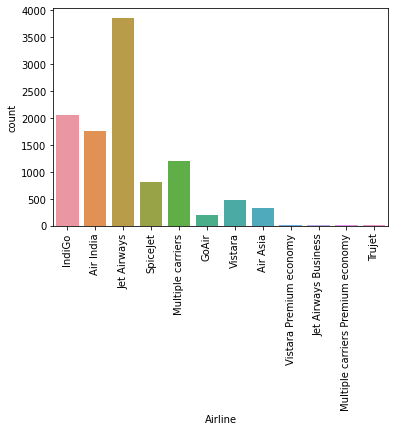

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns # Used for plotting


x = sns.countplot(data = data, x=data.Airline)
### YOUR CODE HERE ###
#uncomment this after you use seaborn
plt.xticks(rotation=90)
plt.show() 



### Data Preprocessing and Feature Engineering

We observe that this dataset has a mixture of data types ranging from: strings, date-time strings, and integers. 

Now we are ready to do some data preprocessing! Let's pretend we want to predict "Price", then it is reasonable to assume  "Airline", "Date_of_Journey", "Source", "Destination" , and "Route" could be useful features. We ignore "Dep_Time", "Arrival_Time" and "Duration". Similarly "Total_Stops" can be inferred from "Route" and "Additional_Info" could be useful in the future but for now we ignore it.

The goal of preprocessing is to handle any irregularities in the dataset such as missing values, awkwardly formatted entries and any other outlier cases (also known as data cleaning).
An example of a case we would need to deal with is in "Arrival_Time" row 1, the time and date is specified while other rows only have the time. A decision would have to be made whether or not to keep the date or just use the time. 

After our data is cleaned, we can confidently transform our data into the form machine learning models expect. Machine learning models are mathematical models and they work with vectors and matricies. Therefore after we finishing preprocessing we should have a dataframe of numbers i.e a matrix.

#### (b) Processing: "Airline", "Source" and "Destination"

The data in these columns are strings and therefore not numerical. They must be transformed. There are several ways to do this transformation, but you can try the most simple method for this assignment. 

Given these columns transform the entries from strings to numerical data by:

i) First for **Airline** column define a **vocabulary**, that is a collection of all the unique words. 

ii.) Define a vocabulary **vocabulary** using the combined words of **Source** and **Destination**.

ii) Second, with the knowledge of each unique word create mapping of each word to a unique integer.

iii) Third, with your mapping apply it to each column to complete the transformation to a numerical representation.

In [284]:

dummie_airlies = pd.get_dummies(data.Airline) # generate dummie columns 
#dummie_Source = pd.get_dummies(data.Source)
#dummie_Dest = pd.get_dummies(data.Destination)
Sources = []
s = dict([(y,x+1) for x,y in enumerate(sorted(set(data.Source)))])
data.Source = [s[item] for item in data.Source] 

d = dict([(y,x+1) for x,y in enumerate(sorted(set(data.Destination)))])
data.Destination = [d[item] for item in data.Destination] 

data =  data.drop(['Airline'], axis='columns') # drop unwanted column 

data = pd.concat([data, dummies_airline,], axis= 'columns') #merge dataframes 



#### (c) Processing: "Date_of_Journey"

i) The entries in this column cannot be understood by any machine learning model as is. We must transform them to numerical representation.

Using pandas separate the dates into separate "Months" and "Weekdays". 

See example of creating a new column below.

HINT: dt.day_name() gets the weekday from a datatime format
and dt.month_name() gets the month name.

In [285]:
import datetime as dt # Used to deal with dates

In [286]:
# Overwrite column to be in datatime format
# That is: YYYY/MM/DD -> YYYY-MM-DD
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

In [287]:
data['day_of_week'] = data.Date_of_Journey.dt.day_name()  ### YOUR CODE HERE ###

In [288]:
data['Journey_Month'] = data.Date_of_Journey.dt.month_name() ### YOUR CODE HERE ###

ii) Now that you have these new columns, are these features ready for a machine learning model? Please explain.


No, these are not ready for an ML model since the added data is catagorical and not numerical data. 

#### (d) Processing: Route

Processing "Route" is tricky as they are all different lengthed strings. Why is this a problem? It doesn't have to be if we feed our algorithm an entry one by one but that can be slow. We want to utilize the fact computers are designed to do matrix operations quickly.

To preprocess the "Route" column do the following:

i) Separate the strings by the empty string using split().

ii) Determine a vocabulary made up of each unique airport code and you may include the arrow that separates the codes.

iii) Using this vocabulary information devise a way to make sure all the strings/features are the same size and **NO NEED TO IMPLEMENT** it. Discuss why you choose that method and any limitations you can think of. [HINT: Think about the vocabulary approach from above and an approach called one hot encoding.]


In [289]:
data["Route"]= data["Route"].str.split("→") #I do not include the arrow
data
dummie_Route = pd.get_dummies(data.Route.apply(pd.Series).stack()).sum(level=0)
dummie_Route
data =  data.drop(['Route'], axis='columns')
data = pd.concat([data, dummie_Route], axis = 'columns')


Answer to part (iii): In order to assure that all strings are the same size, we can use one-hot-encoding to create a new column for each destination/stop on the route. Thus in order to decipher between stops all that must by known is the single 0 or 1 bit per column to signify if we stop at that destination or not. 

#### (e) Feature Engineering
Surprise surprise! We have been doing feature engineering all along by preprocessing the data and trasnforming or engineering it into a form a machine learning algorithm will expect.

But this doesn't mean the features cannot be improved!

Consider the "Airline" column from part a) each airline is mapped to a unique integer. Imagine a scenario where we have hundreds of unique airlines, the airline mapped to 100 for example would be weighted more than the airline mapped to 1. Similarly for columns "Source" and "Destination". To fix this discrepancy, we utilize standardization or normalization.

Use standarization to map all the values in these columns to the range [0,1] by using the following expression: 

```scaled_value = (value - min) / (max - min)```.

In [290]:

max_value = data['Source'].max()
min_value = data['Source'].min()
data['Source'] = (data['Source'] - min_value) / (max_value - min_value)


max_value = data['Destination'].max()
min_value = data['Destination'].min()
data['Destination'] = (data['Destination'] - min_value) / (max_value - min_value)
data

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,day_of_week,Journey_Month,AMD,ATQ,BBI,BDQ,BHO,BLR,BLR,BOM,CCU,CCU,COK,COK,DED,DEL,DEL,GAU,GOI,GWL,HBX,HYD,HYD,IDR,IMF,ISK,IXA,IXB,IXC,IXR,IXU,IXZ,JAI,JDH,JLR,KNU,LKO,MAA,NAG,NDC,PAT,PNQ,RPR,STV,TRV,UDR,VGA,VNS,VTZ,BLR,BOM,CCU,DEL,MAA
0,2019-03-24,0.00,1.0,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,0,1,0,0,0,0,0,0,0,0,Sunday,March,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2019-01-05,0.75,0.0,05:50,13:15,7h 25m,2 stops,No info,7662,0,1,0,0,0,0,0,0,0,0,0,0,Saturday,January,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2019-09-06,0.50,0.2,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,0,0,1,0,0,0,0,0,0,0,Friday,September,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2019-12-05,0.75,0.0,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,0,1,0,0,0,0,0,0,0,0,Thursday,December,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2019-01-03,0.00,1.0,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,0,1,0,0,0,0,0,0,0,0,Thursday,January,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2019-09-04,0.75,0.0,19:55,22:25,2h 30m,non-stop,No info,4107,1,0,0,0,0,0,0,0,0,0,0,0,Wednesday,September,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10679,2019-04-27,0.75,0.0,20:45,23:20,2h 35m,non-stop,No info,4145,0,1,0,0,0,0,0,0,0,0,0,0,Saturday,April,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10680,2019-04-27,0.00,0.4,08:20,11:20,3h,non-stop,No info,7229,0,0,0,0,1,0,0,0,0,0,0,0,Saturday,April,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10681,2019-01-03,0.00,1.0,11:30,14:10,2h 40m,non-stop,No info,12648,0,0,0,0,0,0,0,0,0,0,1,0,Thursday,January,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
